In [1]:
import os, sys, json, copy, random
import pandas as pd
import numpy as np
import torch
from matplotlib import pyplot as plt
from fastai.vision import *
from fastai.gen_doc.nbdoc import show_doc
from fastai.utils.mem import  gpu_mem_get_free_no_cache

%reload_ext autoreload
%autoreload 2
from modules.ap3graph import *
from modules.ap3data import build_data, get_truth_df, avg_prediction

gpu_mem_get_free_no_cache()

0

In [2]:
data_mini = build_data(mini_data=True)

In [3]:
len(data_mini.train_dl.x.items)

36

In [38]:
# learn_mini2 = cnn_learner(data_mini, models.resnet34)
# learn_mini2.callback_fns

In [4]:
learn_mini = cnn_learner(data_mini, models.resnet34)

In [5]:
learn_mini.fit_one_cycle(2)

epoch,train_loss,valid_loss,time
0,1.534814,0.457671,00:33
1,1.585847,0.557182,00:33


In [ ]:
learn_mini.loa

In [ ]:
%%debug
lear_mini.save('example-mini')

In [30]:
#load model trained in alphapilot-4.ipynb
# final epoch output:
# 9  0.016133  0.009166
data_big = build_data(size=(288, 432), batch_size=16)
learn_big = cnn_learner(data_big, models.resnet34)
_ = learn_big.load('ap4-big-1')

In [4]:
#get all preds
preds = learn_big.get_preds(n_batch=None, with_loss=True)

In [9]:
len(preds[0])

1165

In [12]:
loss_each_ = torch.nn.MSELoss(reduction='none')
loss_all_ = torch.nn.MSELoss(reduction='sum')

def calc_loss(pred, target):
    '''return tensor-len-1 for '''
    syn_err = [loss_all_(_pred, _target.flatten()) 
                    for _pred, _target in zip(pred, target) ]
    return sum(syn_err)

sum_loss = calc_loss(preds[0], preds[1])
sum_loss

tensor(78.3864)

In [18]:
#from epoch printout in alphapilot-4.ipynb in model `ap4-big-1:
# train-err,  valid-err
# 0.016133, 0.009166

#this is about right for validation error, still off by 10% what gives?
sum_loss / (len(preds[0]) * 8)

tensor(0.0084)

In [19]:
learn_big.callback_fns

[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True)]

In [22]:
type(learn_big.callback_fns[0])

functools.partial

In [23]:
my_recorder = learn_big.callback_fns[0]

In [25]:
type(my_recorder)

functools.partial

In [27]:
learn_big.recorder.losses

AttributeError: 'Learner' object has no attribute 'recorder'

In [26]:
my_recorder.func()

AttributeError: 'functools.partial' object has no attribute 'losses'

In [ ]:
learn_big.

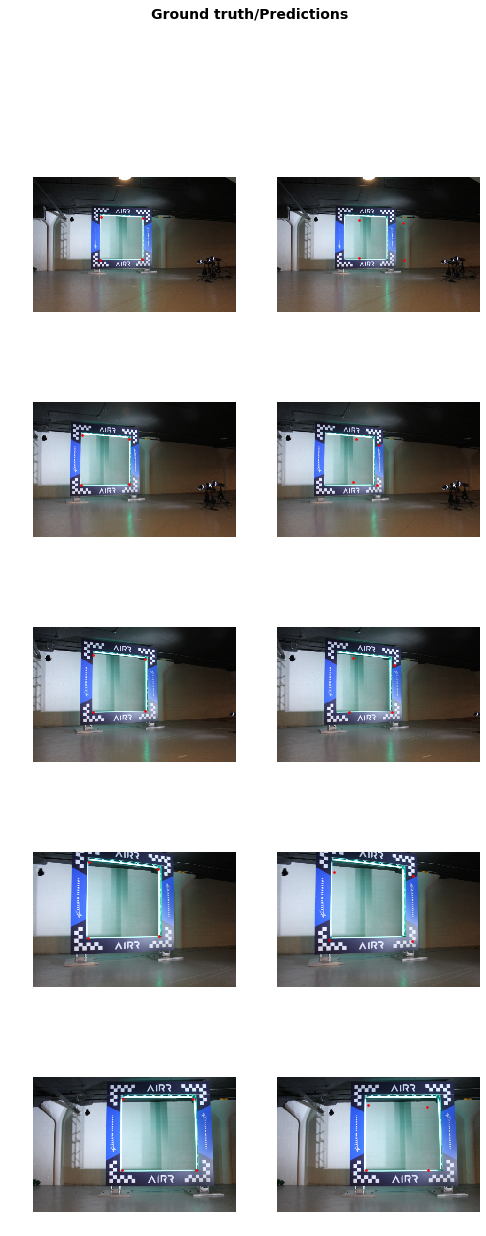

In [20]:
    learn_big.show_results(5)